In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [6]:
df_test = pd.read_csv('./Google_Stock_Price_Test.csv')
df_train = pd.read_csv('./Google_Stock_Price_Train.csv')
df = pd.concat([df_test,df_train])

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1278 non-null   object 
 1   Open    1278 non-null   float64
 2   High    1278 non-null   float64
 3   Low     1278 non-null   float64
 4   Close   1278 non-null   object 
 5   Volume  1278 non-null   object 
dtypes: float64(3), object(3)
memory usage: 102.2+ KB


In [9]:
df.describe()

,Open,High,Low
count,1278.000000,1278.000000,1278.000000
mean,537.994906,542.168897,533.278803
std,154.508365,155.582501,153.174011
min,279.120000,281.210000,277.220000
25%,406.037500,408.230000,403.335000
50%,538.395000,542.330000,534.355000
75%,668.862500,677.705000,662.190000
max,837.810000,841.950000,827.010000


In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
df.shape

(1278, 6)

In [12]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [13]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,object
Volume,object


In [14]:
df    = df.loc[:,["Open"]].values
train = df[:len(df)-50]
test = df[len(train):]
# reshape
train = train.reshape(train.shape[0],1)


In [15]:
train.shape

(1228, 1)

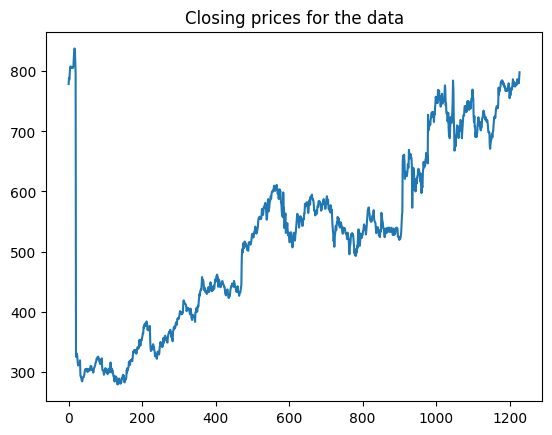

In [16]:
plt.plot(train);
plt.title("Closing prices for the data");


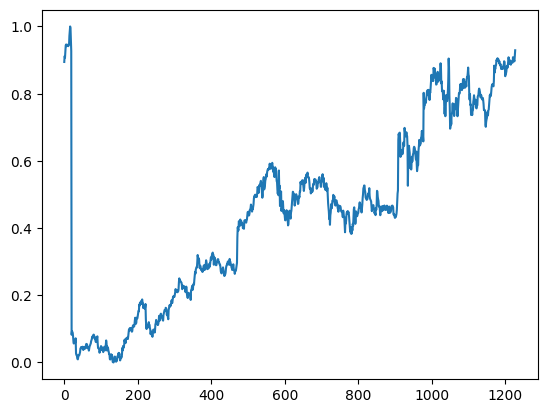

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

In [18]:
# We add first 50 location to "X_train" and we 51. location to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

In [19]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 0.3978
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.2108
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1720
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.1161
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0874
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0785
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0602
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0552
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0489
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0395
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0367
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 0.0298
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0286
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0228
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/st

In [20]:
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [21]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # 0 dan 50 ye, 1 den 51 e gibi kaydirarark 50 eleman aliyoruz
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


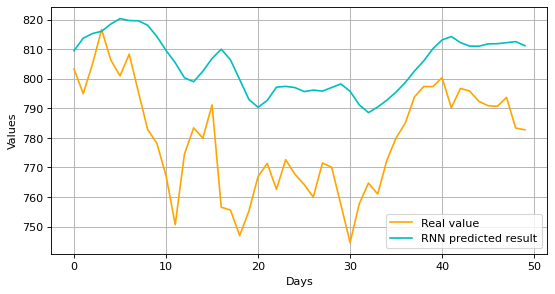

In [23]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [25]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='Adam')
model.fit(X_train,y_train,epochs=50, batch_size=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1178/1178 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0444
Epoch 2/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 9.0559e-04
Epoch 3/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 6.6646e-04
Epoch 4/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 5.8378e-04
Epoch 5/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 5.2575e-04
Epoch 6/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 4.9597e-04
Epoch 7/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 4.6716e-04
Epoch 8/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 5.2109e-04
Epoch 9/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 4.1535e-04
Epoch 10/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 3.6481e-04
Epoch 11/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 2.7419e-04
Epoch 12/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 3.2676e-04
Epoch 13/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 3.1842e-04
Epoch 14/50
1178/1178 ━━━━━━━━━━━━━━

In [26]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


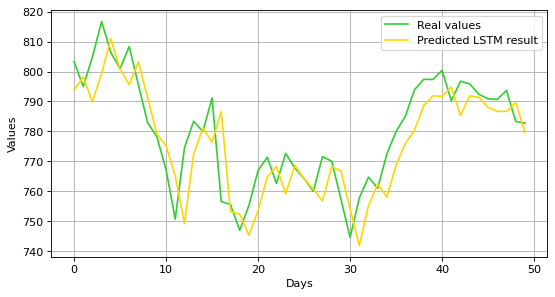

In [27]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

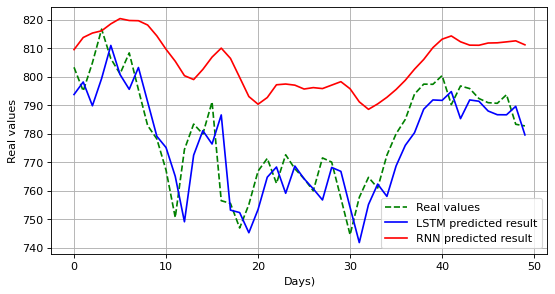

In [28]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
plt.plot(predicted_data,color="red",label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()

In [29]:
# Calculate RMSE for Train and Test data
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# For RNN
train_predicted_rnn = regressor.predict(X_train)
train_predicted_rnn = scaler.inverse_transform(train_predicted_rnn)
rmse_train_rnn = calculate_rmse(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predicted_rnn)
rmse_test_rnn = calculate_rmse(test, predicted_data)

# For LSTM
train_predicted_lstm = model.predict(X_train)
train_predicted_lstm = scaler.inverse_transform(train_predicted_lstm)
rmse_train_lstm = calculate_rmse(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predicted_lstm)
rmse_test_lstm = calculate_rmse(test, predicted_data2)

# Display the RMSE values
print(f"Train RMSE for RNN: {rmse_train_rnn}")
print(f"Test RMSE for RNN: {rmse_test_rnn}")
print(f"Train RMSE for LSTM: {rmse_train_lstm}")
print(f"Test RMSE for LSTM: {rmse_test_lstm}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Train RMSE for RNN: 24.0368106138842
Test RMSE for RNN: 28.33965791447748
Train RMSE for LSTM: 8.702397050285615
Test RMSE for LSTM: 10.479691327542456


In [30]:
# Function to calculate MAPE
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# For RNN
mape_train_rnn = calculate_mape(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predicted_rnn)
mape_test_rnn = calculate_mape(test, predicted_data)

# For LSTM
mape_train_lstm = calculate_mape(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predicted_lstm)
mape_test_lstm = calculate_mape(test, predicted_data2)

# Display the MAPE values
print(f"Train MAPE for RNN: {mape_train_rnn:.2f}%")
print(f"Test MAPE for RNN: {mape_test_rnn:.2f}%")
print(f"Train MAPE for LSTM: {mape_train_lstm:.2f}%")
print(f"Test MAPE for LSTM: {mape_test_lstm:.2f}%")


Train MAPE for RNN: 3.63%
Test MAPE for RNN: 3.27%
Train MAPE for LSTM: 1.10%
Test MAPE for LSTM: 1.08%
